In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [142]:
#import data from .csv file of guithub repository
housing = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/Tareq-BD/ECGR-5105/main/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:
m = len(housing)
m

545

In [145]:
housing.shape

(545, 13)

In [146]:
# List of variables to map (string to numerical values)
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [147]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [148]:
df_test.shape

(109, 13)

In [149]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
22,8050,3,1,1,1,8645000
41,6360,3,2,4,0,7840000
91,6750,2,1,1,2,6419000
118,6420,3,1,1,0,5950000
472,3630,4,1,2,3,3010000


In [150]:
df_Newtrain.shape

(436, 6)

In [151]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [152]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking
22,8050,3,1,1,1
41,6360,3,2,4,0
91,6750,2,1,1,2
118,6420,3,1,1,0
472,3630,4,1,2,3


In [153]:
y_Newtrain.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [154]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 8645000  7840000  6419000  5950000  3010000  3850000 12250000  4480000
  5110000  4319000]


In [155]:
# preparing the training set

X1 = df_Newtrain.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1)   
X2 = df_Newtrain.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2)          
X3 = df_Newtrain.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3)           
X4 = df_Newtrain.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4)          
X5 = df_Newtrain.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5)

# print first 10 values from each variable

print('X1 = ', X1[: 10]) 
print('X2 = ', X2[: 10])
print('X3 = ', X3[: 10])
print('X4 = ', X4[: 10])
print('X5 = ', X5[: 10])

X1 =  [8050 6360 6750 6420 3630 3850 8960 8250 3000 4032]
X2 =  [3 3 2 3 4 2 4 3 3 2]
X3 =  [1 2 1 1 1 1 4 1 2 1]
X4 =  [1 4 1 1 2 1 4 1 2 1]
X5 =  [1 0 2 0 3 0 3 0 0 0]


In [156]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))       # Creating a single column matrix (X_0) of training set size, contains all ones 
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [157]:
# Converting 1D arrays of X1, X2, X3, X4 and X5 to 2D arrays
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)

# print first 5 values from each 2D array
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])

X_1 =  [[8050]
 [6360]
 [6750]
 [6420]
 [3630]]
X_2 =  [[3]
 [3]
 [2]
 [3]
 [4]]
X_3 =  [[1]
 [2]
 [1]
 [1]
 [1]]
X_4 =  [[1]
 [4]
 [1]
 [1]
 [2]]
X_5 =  [[1]
 [0]
 [2]
 [0]
 [3]]


In [158]:
# Stacking X_0, X_1, X_2, X_3, X-4 and X_5 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X [: 5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 3.00e+00]])

In [159]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [160]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [161]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,parking
265,2880,3,1,2,0
54,6000,3,2,2,1
171,10269,3,1,1,1
244,5320,3,1,2,0
268,4950,4,1,2,0


In [162]:
y_Newtest.head()

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
Name: price, dtype: int64

In [163]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [4403000 7350000 5250000 4550000 4382000 4690000 8540000 5250000 2730000
 5950000]


In [164]:
# preparing the testing/validarion set
X1_test = df_Newtest.values[:, 0]     # getting input value from first column and putting in Variable-1 (X1_test)            
X2_test = df_Newtest.values[:, 1]     # getting input value from first column and putting in Variable-2 (X2_test)            
X3_test = df_Newtest.values[:, 2]     # getting input value from first column and putting in Variable-3 (X3_test)           
X4_test = df_Newtest.values[:, 3]     # getting input value from first column and putting in Variable-4 (X4_test)           
X5_test = df_Newtest.values[:, 4]     # getting input value from first column and putting in Variable-5 (X5_test)

# print first 10 values from each variable

print('X1_test = ', X1_test[: 10]) 
print('X2_test = ', X2_test[: 10])
print('X3_test = ', X3_test[: 10])
print('X4_test = ', X4_test[: 10])
print('X5_test = ', X5_test[: 10])

X1_test =  [ 2880  6000 10269  5320  4950  4320  6540  6540  6800  6540]
X2_test =  [3 3 3 3 4 3 4 4 2 3]
X3_test =  [1 2 1 1 1 1 2 2 1 1]
X4_test =  [2 2 1 2 2 1 2 2 1 1]
X5_test =  [0 1 1 0 0 0 2 0 0 2]


In [223]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     # Creating a single column matrix (X_0_test) of validation set size, contains all ones
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [166]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)

# print first 5 values from each 2D array
print('X_1_test = ', X_1_test[: 5])
print('X_2_test = ', X_2_test[: 5])
print('X_3_test = ', X_3_test[: 5])
print('X_4_test = ', X_4_test[: 5])
print('X_5_test = ', X_5_test[: 5])

X_1_test =  [[ 2880]
 [ 6000]
 [10269]
 [ 5320]
 [ 4950]]
X_2_test =  [[3]
 [3]
 [3]
 [3]
 [4]]
X_3_test =  [[1]
 [2]
 [1]
 [1]
 [1]]
X_4_test =  [[2]
 [2]
 [1]
 [2]
 [2]]
X_5_test =  [[0]
 [1]
 [1]
 [0]
 [0]]


In [167]:
# Stacking X_0_test through X_5_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))
X_test [: 5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00]])

In [168]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [169]:
# computing the cost for initial theta values

cost = compute_cost(X, y, theta, m)
print('The initial cost for given values of theta_0 to theta_5 = ', cost)

The initial cost for given values of theta_0 to theta_5 =  13238799902211.697


In [170]:
# defining function for gradient descent algorithm
# gradient descent algorithm is applied on the training set
# for each iteration loss for both training and validation set is calculated

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set
    
    return theta, cost_history, cost_test

In [219]:
# We need theta parameter for every input variable. since we have six input variables

theta = [0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha = 0.00000001

In [220]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [5.03540356e-01 8.61913122e+02 1.78781714e+00 9.85545405e-01
 1.48654329e+00 4.03761042e-01]
cost_history = [7.17395258e+12 4.29408729e+12 2.92659628e+12 2.27724935e+12
 1.96890988e+12 1.82249626e+12 1.75297240e+12 1.71995928e+12
 1.70428313e+12 1.69683936e+12 1.69330470e+12 1.69162626e+12
 1.69082923e+12 1.69045075e+12 1.69027101e+12 1.69018563e+12
 1.69014507e+12 1.69012579e+12 1.69011661e+12 1.69011223e+12
 1.69011013e+12 1.69010911e+12 1.69010860e+12 1.69010834e+12
 1.69010820e+12 1.69010810e+12 1.69010804e+12 1.69010798e+12
 1.69010794e+12 1.69010789e+12 1.69010785e+12 1.69010781e+12
 1.69010776e+12 1.69010772e+12 1.69010768e+12 1.69010764e+12
 1.69010760e+12 1.69010755e+12 1.69010751e+12 1.69010747e+12
 1.69010743e+12 1.69010739e+12 1.69010735e+12 1.69010730e+12
 1.69010726e+12 1.69010722e+12 1.69010718e+12 1.69010714e+12
 1.69010709e+12 1.69010705e+12 1.69010701e+12 1.69010697e+12
 1.69010693e+12 1.69010688e+12 1.69010684e+12 1.69010680e+12
 1.69010676e+12 

Text(0.5, 1.0, 'Convergence of Gradient Descent')

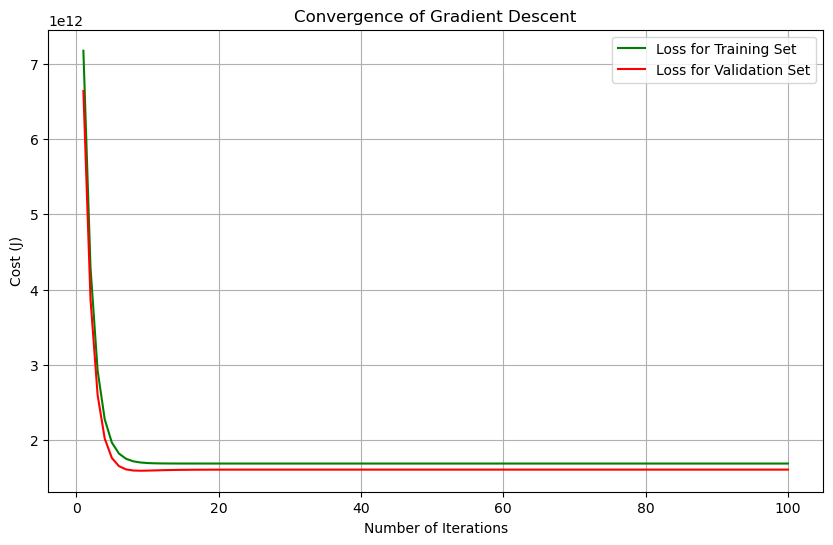

In [222]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')